# Logistic regression - Notebook Sample



## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
# this line plots graphs in line
%matplotlib inline


## Importing the raw dataset

In [2]:
# Data set is containted in the same path, in the archive folder
dataset = pd.read_csv("archive/creditcard.csv")

In [3]:
#dataset.info()

In [4]:
#dataset.head(20)

## Undersampling
This is done due to the large bias in the data

In [5]:
def rands(row):
    if( row ==0):
        return  np.random.uniform(low=0, high=0.999)
    else:
        return 0
    

In [6]:
np.random.seed(0)
dataset['rand'] =dataset.Class.apply(rands)
dataUnder = dataset.drop(dataset[(dataset.rand > 0.00167) ].index)


In [7]:
dataUnder=dataUnder.drop(['rand'], axis=1)

1    492
0    468
Name: Class, dtype: int64
as a percentage of the whole dataset
1    51.25
0    48.75
Name: Class, dtype: float64


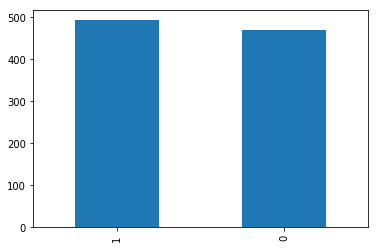

In [8]:
fig, ax = plt.subplots()
print(dataUnder.Class.value_counts())
print("as a percentage of the whole dataset")
print((dataUnder.Class.value_counts()*100)/ len(dataUnder))
dataUnder.Class.value_counts().plot(ax=ax, kind='bar')

In [9]:
#shuffeling the order of the data
dataUnderShuffled = dataUnder.sample(frac =1, random_state=1)

In [10]:
#dataUnderShuffled.head()

## Feature selection

The time feature was removed since it was a feature relating the structre of the experiment. This feature represents the time elapsed since the start of the experiment, and has no relation to credit card fraud.

In [11]:
dataUnderShuffled=dataUnderShuffled.drop(['Time'], axis=1)

#### Use of Corelation Matrix

## Dimention Reduction
Here we explore dimention reduction through the use of PCA

## Logistic Regression
Below are the functions created to be used by the Logistic Regression Model

Sigmoid - returns a probability of the instance being in class 1

In [12]:
def sig_toGetProb(power):
    return 1/(1+ np.exp(-power))


This is the partial derivative of the cross Entropy cost funtion wrt to wrt weights

In [13]:


def ent_partial(X, Y,W,Bias, M):
    
    z = np.dot(W, X.T) + Bias

    yPred= sig_toGetProb(z)
  
    dotSum = np.dot((Y - yPred), X)
    minus1OnM = (-1 / M)
    
    biasDelta = minus1OnM * sum(Y - yPred)
    weightDelta = minus1OnM *dotSum
    return weightDelta, biasDelta


Gradient Decent - Used to minimise cost

In [14]:
def grad_decMACHINE(a, dataX, Y, W,B, iterations, M ):
    # a -> the learning rate
    # data -> containing a Class filed which is our Y. 
    # W starting wieghts
    # interations -> how many iterations of gradient decent will be used.

    # Performing Gradient Descent 
    for i in range(iterations):  
        deltaW, deltaB = ent_partial(dataX, Y, W ,B ,M)
        W = W - (a*deltaW)
        B = B - (a*deltaB)

    return W, B

In [68]:
def prdictor(W,B,X):
    z = np.dot(W, X.T) + B
    
    yPred= sig_toGetProb(z)

    prediction = np.zeros(len(z))
    for i in range(len(z)):
        prediction[i] = (0 if sig_toGetProb(z[i])<0.5 else 1)
    
    return prediction

### Metrics

In [66]:
def acc(pred,act):
    countCorrect = 0
    for i in range(len(pred)):
        if(int(pred[i]) ==int(act[i])):
            countCorrect +=1
    return countCorrect/ len(pred)

In [ ]:
""" 
                   True class
                   0        1
            0    TN        FP
 Predicted  1    FN        TP

"""

In [72]:
def confusion_Matrix( pred, act):
    confMat = np.zeros((2,2))
    for i in range(len(pred)):
        if(int(act[i]) == 0):
            if(int(pred[i])==0):
                confMat[0,0] +=1
            elif (int(pred[i]) == 1):
                confMat[1,0] += 1
        if(int(act[i])==1):
            if(int(pred[i]) == 0):
                confMat[0,1] +=1
            elif (int(pred[i]) == 1):
                confMat[1,1] += 1
    return confMat

In [74]:
def rec_pre_f1_ac(conf):
    TrueNeg = int(conf[0,0])
    FalseNeg = int(conf[1,0])
    FalsePos =int(conf[0,1])
    TruePos = int(conf[1,1])
    
    recall = TruePos / (TruePos+ FalseNeg)
    prec = TruePos/ (TruePos+ FalsePos)
    f1 = 2 * (prec* recall)/ (prec+recall)
    accuracy2 = (TruePos+ TrueNeg)/(FalseNeg+FalsePos+ TruePos+ TrueNeg)
    
    return recall, prec, f1, accuracy2
    
    

# Running 

In [15]:
## Establishing a training and test set

In [16]:
data = dataUnderShuffled.to_numpy()
Split = 0.75
SplitPosition = int(len(data)*Split)

In [17]:
d_train= np.array(data[0:SplitPosition,:])
d_test = np.array(data[SplitPosition:,:])
print ('Shape of train = ',np.shape(d_train))
print ('Shape of test = ',np.shape(d_test))

Shape of train =  (720, 30)
Shape of test =  (240, 30)


### Tuning - Establishing the right conditions for our model

Hyperparameters like the learning rate and number of iterations need to be optimised for this task. To avoid introducing the unseen data (reserved for testing) in this tuning process, k fold cross validation is used.


Here we make use of 5 folds

In [54]:
Split = 0.20
SplitPosition = int(len(d_train)*Split)
folds =[]
data_to_split = d_train
for i in range(5):
    folds.append([data_to_split[SplitPosition*(i):(SplitPosition*(i+1)),:]][0])


In [73]:
#print(len(folds))
#one_fold = folds[1]
#print(one_fold.shape)
#folds

In [56]:
from itertools import cycle

In [71]:
iterations = 10000
alpha  = 0.001
np.random.seed(0)
Wstart = np.random.rand(np.shape(currentData)[1] -1)/100
B = 0.001
# ----------------------------------------------------------------

lst = [0,1,2,3,4]

pool = cycle(lst)
fold_results = []

for i in range(5):
    print("FOLD NO :", i)
    zero = next(pool)
    one = next(pool)
    two =next(pool)
    three =next(pool)
    four =next(pool)
    next(pool)
    
    ######## creating train and val sets for this fold

    train = np.concatenate((folds[zero], folds[one], folds[two]), axis=0,)
    val  = np.concatenate((folds[three], folds[four]), axis=0,)

    ##train
    currentData = train
    M = len(currentData)

    Y = currentData[:, -1]
    X = currentData[:,:-1]
    Weights, Bias = grad_decMACHINE(alpha, X, Y, Wstart, B,iterations, M )
    
    ##predict 
    currentData = test

    YTest = currentData[:, -1]
    XTest = currentData[:,:-1]
    preditcted = prdictor(Weights,Bias, XTest)
    
    
    ##results    
    accuraacy = acc(preditcted,YTest)
    print("Fold ", i, "- accuracy : ", accuraacy)
    fold_results.append(accuraacy)


    
print("Average over all folds :")
print(np.mean(fold_results))

FOLD NO : 0
Fold  0 - accuracy :  0.8958333333333334
FOLD NO : 1
Fold  1 - accuracy :  0.9027777777777778
FOLD NO : 2
Fold  2 - accuracy :  0.9201388888888888
FOLD NO : 3
Fold  3 - accuracy :  0.9236111111111112
FOLD NO : 4
Fold  4 - accuracy :  0.9201388888888888
Average over all folds :
0.9125


##### Now we train on the full train set, with the chosen hyper-params

In [75]:
##train
currentData = d_train
M = len(currentData)

Y = currentData[:, -1]
X = currentData[:,:-1]
Weights, Bias = grad_decMACHINE(alpha, X, Y, Wstart, B,iterations, M )

##predict 
currentData = d_test

YTest = currentData[:, -1]
XTest = currentData[:,:-1]
preditcted = prdictor(Weights,Bias, XTest)


##results    
confMat = confusion_Matrix(preditcted,YTest)


In [77]:
recall, precision, f1, accuracy = rec_pre_f1_ac(confMat)
print("Recall:    ",recall)
print("Precision: ",precision)
print("F1:        ",f1)
print("accuracy:  ",accuracy)


        

Recall:     0.8759124087591241
Precision:  0.9523809523809523
F1:         0.9125475285171103
accuracy:   0.9041666666666667


## Feature selction by dropping lowest weights
            
        

In [100]:
weightsDf = pd.DataFrame(Weights, columns=["Weights"])
weightsDf['abs_w'] = weightsDf.Weights.apply(abs)
#weightsDf

,Weights,abs_w
0,-0.185222,0.185222
1,0.030285,0.030285
2,-0.284981,0.284981
3,0.558859,0.558859
4,-0.307305,0.307305
5,0.053582,0.053582
6,-0.123011,0.123011
7,-0.329393,0.329393
8,-0.185761,0.185761
9,-0.452636,0.452636


In [101]:
weightsSorted = weightsDf.sort_values(by= ["abs_w"])

In [103]:
#weightsSorted

,Weights,abs_w
14,0.000871,0.000871
28,0.002619,0.002619
1,0.030285,0.030285
24,-0.045332,0.045332
27,-0.045427,0.045427
23,-0.051662,0.051662
5,0.053582,0.053582
25,-0.065711,0.065711
21,0.066035,0.066035
12,-0.080339,0.080339


In [109]:
#weightsSorted.index.tolist()

In [110]:
wantedCols =weightsSorted.index.tolist()[-24:]

## Here I am not doing validation properly. Just testing


In [113]:
##train
currentData = d_train
M = len(currentData)

Y = currentData[:, -1]
X = currentData[:,:-1]

X = X[:,wantedCols]
Wstart = Wstart[wantedCols]
Weights, Bias = grad_decMACHINE(alpha, X, Y, Wstart, B,iterations, M )

##predict 
currentData = d_test

YTest = currentData[:, -1]
XTest = currentData[:,:-1]
XTest = XTest[:,wantedCols]
preditcted = prdictor(Weights,Bias, XTest)


##results    
confMat = confusion_Matrix(preditcted,YTest)


In [114]:
recall, precision, f1, accuracy = rec_pre_f1_ac(confMat)
print("Recall:    ",recall)
print("Precision: ",precision)
print("F1:        ",f1)
print("accuracy:  ",accuracy)


Recall:     0.9672131147540983
Precision:  0.9365079365079365
F1:         0.9516129032258064
accuracy:   0.95


## Comparision to 3rd Part

In [78]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr = LogisticRegression( solver= 'liblinear').fit(X, Y)
pred =lr.predict(XTest)

In [79]:
confMat = confusion_Matrix(preditcted,YTest)
recall, precision, f1, accuracy = rec_pre_f1_ac(confMat)
print("Recall:    ",recall)
print("Precision: ",precision)
print("F1:        ",f1)
print("accuracy:  ",accuracy)

Recall:     0.8759124087591241
Precision:  0.9523809523809523
F1:         0.9125475285171103
accuracy:   0.9041666666666667
